<a href="https://colab.research.google.com/github/Najila-1234/object_detection/blob/main/inception_v3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'food-101:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2918922%2F5029790%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240609%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240609T164705Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Daa34350492fed259c9f52a626e285400dc5b52b86c3d2cba4b75aac6734c355fc2d62287f08c077cd396f2f45db80352c159d90cbe9365c2632a4a86b3380b8bb349c71ac0bab59b551ebcfb936dd48b9822f1e4643c752f75f31dffcd88b1b5b3d406e1c2d12519c468a00127fbed807d45ad68c82b98da31ebf270680088fa26398665e0fd792a567b8d816480859ee8e0d69047a0b1668c8383878dade5f9427c9926617fc137629bdfa3cb32bf6c02416df65ec231e3ab39ef1c627cf5eff0ef93edee673f62780329e4e32daa9e611fbd1c6c9fc5642e0be2f2b4951e2a8be03fee9067a1904858d9c01364322359efeabe402e97f34fe431d76ae4c3c9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5003444112 bytes downloaded
Downloaded and uncompressed: food-101
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/food-101/food-101/train/cannoli/3538923.jpg
/kaggle/input/food-101/food-101/train/cannoli/1999962.jpg
/kaggle/input/food-101/food-101/train/cannoli/1808339.jpg
/kaggle/input/food-101/food-101/train/cannoli/2456115.jpg
/kaggle/input/food-101/food-101/train/cannoli/166333.jpg
/kaggle/input/food-101/food-101/train/cannoli/416807.jpg
/kaggle/input/food-101/food-101/train/cannoli/3076608.jpg
/kaggle/input/food-101/food-101/train/cannoli/2717011.jpg
/kaggle/input/food-101/food-101/train/cannoli/109727.jpg
/kaggle/input/food-101/food-101/train/cannoli/1366453.jpg
/kaggle/input/food-101/food-101/train/cannoli/3459604.jpg
/kaggle/input/food-101/food-101/train/cannoli/3293295.jpg
/kaggle/input/food-101/food-101/train/cannoli/1416610.jpg
/kaggle/input/food-101/food-101/train/cannoli/2597194.jpg
/kaggle/input/food-101/food-101/train/cannoli/548477.jpg
/kaggle/input/food-101/food-101/train/cannoli/3355791.jpg
/kaggle/input/food-101/fo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/273194.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/2791005.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/3828520.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/2699587.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/78092.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/33714.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/1888050.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/2708677.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/1155587.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/3750089.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/18310.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_cheese/1530491.jpg
/kaggle/input/food-101/food-101/validation/macaroni_and_

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D,Input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data='/kaggle/input/food-101/food-101/train'
testing_data='/kaggle/input/food-101/food-101/validation'

In [ ]:
# select the 15 classes
class_indices = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake'
]


In [ ]:
# Image size and batch size
image_size = (229, 229)
batch_size = 32

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create an ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data using flow_from_directory, only include specified classes
train_generator = train_datagen.flow_from_directory(
    training_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_indices
)

# Load testing data using flow_from_directory, only include specified classes
test_generator = test_datagen.flow_from_directory(
    testing_data,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_indices
)

Found 14250 images belonging to 15 classes.
Found 750 images belonging to 15 classes.


In [ ]:
# Load the Inception V3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


In [ ]:
# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Define the input layer
inputs =Input(shape=(299, 299, 3))


# Pass the input through the Inception V3 base model
x = base_model(inputs, training=False)

# Add global average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(128, activation='relu')(x)

# Add the output layer
outputs = Dense(len(class_indices), activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model

# Create the model
model = Model(inputs, outputs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=5
)

Epoch 1/5
445/445 [==============================] - 65s 133ms/step - loss: 1.3370 - accuracy: 0.5800 - val_loss: 1.0215 - val_accuracy: 0.6576
Epoch 2/5
445/445 [==============================] - 47s 106ms/step - loss: 1.0042 - accuracy: 0.6805 - val_loss: 0.9806 - val_accuracy: 0.6929
Epoch 3/5
445/445 [==============================] - 49s 110ms/step - loss: 0.9013 - accuracy: 0.7106 - val_loss: 0.9314 - val_accuracy: 0.6875
Epoch 4/5
445/445 [==============================] - 48s 108ms/step - loss: 0.8163 - accuracy: 0.7335 - val_loss: 0.9522 - val_accuracy: 0.7024
Epoch 5/5
445/445 [==============================] - 47s 106ms/step - loss: 0.7626 - accuracy: 0.7517 - val_loss: 0.9042 - val_accuracy: 0.7052


In [ ]:
 #Evaluate the model
score = model.evaluate(test_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])



24/24 [==============================] - 2s 94ms/step - loss: 0.9032 - accuracy: 0.7067
Validation loss: 0.9032392501831055
Validation accuracy: 0.7066666483879089


In [ ]:
# save the model
from joblib import dump,load
dump(model,"food_inception.joblib")
# load the model
load=load("food_inception.joblib")

In [ ]:
# predict the model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
# Load and preprocess the image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
img_path = '/content/apple_pie.webp'
img = image.load_img(img_path, target_size=(299, 299))


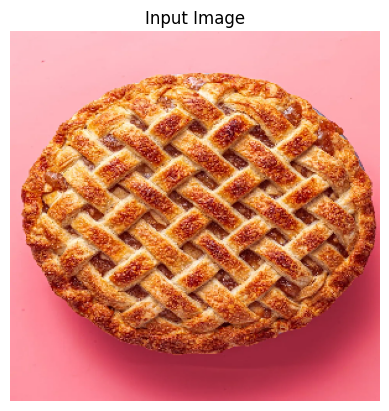

In [ ]:
# Display the image
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

In [ ]:
# Convert the image to a numpy array
img_array = image.img_to_array(img)

In [ ]:
# Expand dimensions to match the shape the model expects
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
# Preprocess the image for the InceptionV3 model
img_array = preprocess_input(img_array)


In [ ]:
# Predict the probabilities for the input image
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 28ms/step
[[0.2994572  0.01222774 0.06712797 0.0153468  0.07574695 0.00877791
  0.06008734 0.00415286 0.10931787 0.03128619 0.07776692 0.01762363
  0.03923936 0.01850666 0.1633346 ]]


In [ ]:
# Ensure predictions have the correct shape
print(predictions.shape)

(1, 15)


In [ ]:
# Get the index of the class with the highest predicted probability
predicted_class_index = np.argmax(predictions, axis=1)[0]

In [ ]:
# List of class names (assuming you have a list of class names in the same order as the training classes)

class_names = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake'
]


In [ ]:
# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]


In [ ]:
# Print the predicted class name
print(f"Predicted class name: {predicted_class_name}")

Predicted class name: apple_pie
